In [1]:
print('hi')

hi


### Import Libraries

In [2]:
import numpy as np
import pandas as pd
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

### Dataset Overview

The dataset encompasses customer satisfaction scores over a one-month period on an e-commerce platform named "Shopzilla." It consists of the following features:

* Unique id: Unique identifier for each record (integer).
* Channel name: Name of the customer service channel (object/string).
* Category: Category of the interaction (object/string).
* Sub-category: Sub-category of the interaction (object/string).
* Customer Remarks: Feedback provided by the customer (object/string).
* Order id: Identifier for the order associated with the interaction (integer).
* Order date time: Date and time of the order (datetime).
* Issue reported at: Timestamp when the issue was reported (datetime).
* Issue responded: Timestamp when the issue was responded to (datetime).
* Survey response date: Date of the customer survey response (datetime).
* Customer city: City of the customer (object/string).
* Product category: Category of the product (object/string).
* Item price: Price of the item (float).
* Connected handling time: Time taken to handle the interaction (float).
* Agent name: Name of the customer service agent (object/string).
* Supervisor: Name of the supervisor (object/string).
* Manager: Name of the manager (object/string).
* Tenure Bucket: Bucket categorizing agent tenure (object/string).
* Agent Shift: Shift timing of the agent (object/string).
* CSAT Score: Customer Satisfaction (CSAT) score (integer).


In [3]:
df = pd.read_csv('C:/Users/Ishwar/custom_support/data/csat-data.csv')

In [4]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [5]:
df.tail()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4
85906,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,NaN,3230db30-f8da-4c44-8636-ec76d1d3d4f3,NaN,31/08/2023 23:36,31/08/2023 23:37,31-Aug-23,NaN,NaN,NaN,NaN,Elizabeth Guerra,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,5


In [6]:
# shape of the dataset
df.shape

(85907, 20)

In [7]:
# columns of dataset
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

## Data Preprocessing

### Check for null values in dataset

In [8]:
null_values = df.isna().sum().sort_values(ascending=False)
null_values

connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
Unique id                      0
Sub-category                   0
category                       0
channel_name                   0
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

[]

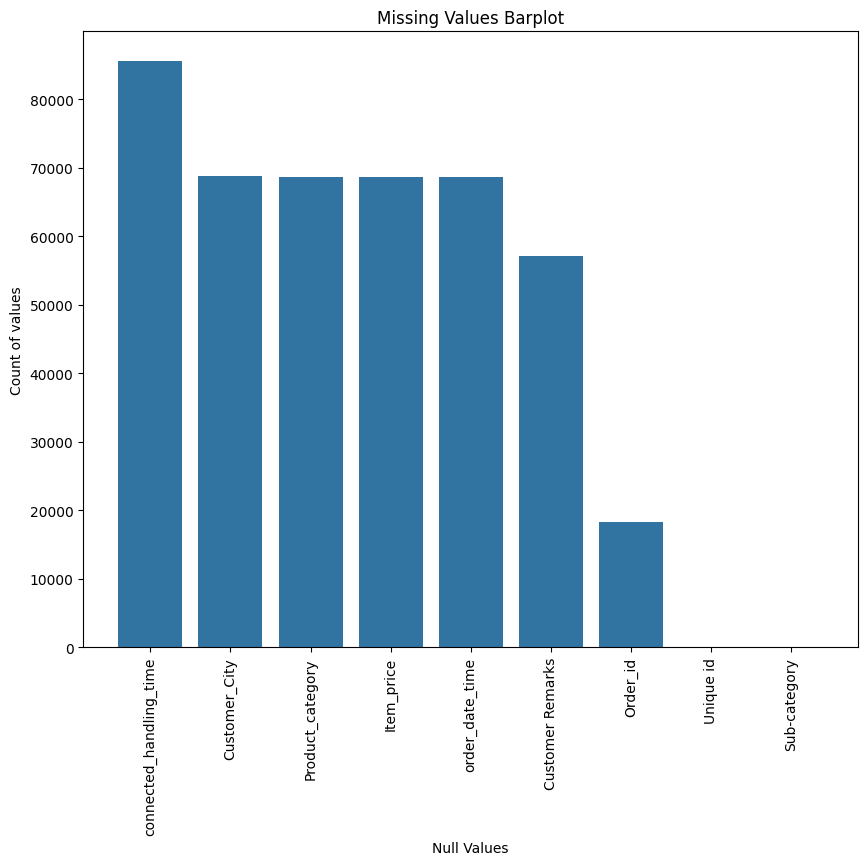

In [9]:
# visualize the null values of top 9 

plt.figure(figsize=(10,8))
sns.barplot(null_values[:9])
plt.xticks(rotation= 'vertical')
plt.title("Missing Values Barplot")
plt.xlabel("Null Values")
plt.ylabel("Count of values")
plt.plot()

### Drop columns with >70% missing values

In [10]:
# connected_handling_time - 99.72% missing
# Customer_City - 80.12% missing
# Product_category - 79.96% missing
# Item_price - 79.95% missing
# order_date_time - 79.94% missing

cols_to_drop = ['connected_handling_time', 'Customer_City', 'Product_category', 'Item_price', 'order_date_time']
df = df.drop(columns=cols_to_drop)
print("Remaining columns:", df.columns)

Remaining columns: Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'Issue_reported at', 'issue_responded',
       'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager',
       'Tenure Bucket', 'Agent Shift', 'CSAT Score'],
      dtype='object')


### Impute columns with <70% missing values

In [11]:
# Customer Remarks: 66.54%
# Order_id: 21.22%

df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remarks')

In [12]:
# since order_id is a unique identifier column, it's better to drop those rows rather than imputing the column
df = df.dropna(subset=['Order_id'])

In [13]:
df.isna().sum()

Unique id               0
channel_name            0
category                0
Sub-category            0
Customer Remarks        0
Order_id                0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

### Unique values and their count

In [14]:
for column in df :
  print(column)
  print(df[column].unique())

Unique id
['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880' ...
 '723bce2c-496c-4aa8-a64b-ca17004528f0'
 '707528ee-6873-4192-bfa9-a491f1c08ab5'
 '07c7a878-0d5a-42e0-97ef-de59abec0238']
channel_name
['Outcall' 'Inbound' 'Email']
category
['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website']
Sub-category
['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request'
 'Delayed' 'Service Centres Related' 'Payment related Queries'
 'Order status enquiry' 'Return cancellation' 'Unable to track'
 'Seller Cancelled Order' 'Wrong' 'Invoice request' 'Priority delivery'
 'Refund Related Issues' 'Signup Issues' 'Online Payment Issues'
 'Technician Visit' 'UnPr

In [15]:
for column in df :
  print(column ,'-', df[column].nunique())

Unique id - 67675
channel_name - 3
category - 12
Sub-category - 57
Customer Remarks - 14500
Order_id - 67675
Issue_reported at - 26535
issue_responded - 25506
Survey_response_Date - 31
Agent_name - 1371
Supervisor - 40
Manager - 6
Tenure Bucket - 5
Agent Shift - 5
CSAT Score - 5


In [16]:
df.duplicated().sum()

np.int64(0)

### Dataset Information

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67675 entries, 0 to 85906
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             67675 non-null  object
 1   channel_name          67675 non-null  object
 2   category              67675 non-null  object
 3   Sub-category          67675 non-null  object
 4   Customer Remarks      67675 non-null  object
 5   Order_id              67675 non-null  object
 6   Issue_reported at     67675 non-null  object
 7   issue_responded       67675 non-null  object
 8   Survey_response_Date  67675 non-null  object
 9   Agent_name            67675 non-null  object
 10  Supervisor            67675 non-null  object
 11  Manager               67675 non-null  object
 12  Tenure Bucket         67675 non-null  object
 13  Agent Shift           67675 non-null  object
 14  CSAT Score            67675 non-null  int64 
dtypes: int64(1), object(14)
memory usage: 8.3

### change datatype of datetime columns

In [18]:
# changing datatype of datetime columns

datetime_col = ['Issue_reported at', 'issue_responded', 'Survey_response_Date']

for col in datetime_col :
  df[col] = pd.to_datetime(df[col], format='mixed', dayfirst=True)

In [19]:
df.describe()

,Issue_reported at,issue_responded,Survey_response_Date,CSAT Score
count,67675,67675,67675,67675.000000
mean,2023-08-17 17:23:08.479350016,2023-08-17 19:50:48.267750144,2023-08-17 05:35:10.421869056,4.225445
min,2023-07-28 20:42:00,2023-08-01 00:00:00,2023-08-01 00:00:00,1.000000
25%,2023-08-09 12:32:00,2023-08-09 14:42:00,2023-08-09 00:00:00,4.000000
50%,2023-08-18 20:44:00,2023-08-19 07:01:00,2023-08-19 00:00:00,5.000000
75%,2023-08-25 12:08:00,2023-08-25 14:00:30,2023-08-25 00:00:00,5.000000
max,2023-08-31 23:58:00,2023-08-31 23:59:00,2023-08-31 00:00:00,5.000000
std,NaN,NaN,NaN,1.392488


In [20]:
df.describe(include=["object"])

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift
count,67675,67675,67675,67675,67675,67675,67675,67675,67675,67675,67675
unique,67675,3,12,57,14500,67675,1371,40,6,5,5
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,No Remarks,3230db30-f8da-4c44-8636-ec76d1d3d4f3,Wendy Taylor,Carter Park,John Smith,>90,Morning
freq,1,53278,34501,17433,45036,1,346,3448,19516,23877,32868


## EDA - Exploratory Data Analysis

1. What is the distribution of CSAT scores?

Understanding the spread of CSAT scores helps identify customer satisfaction trends.



In [21]:
# customer satisfaction score for each categories
df['CSAT Score'].value_counts().sort_index()

CSAT Score
1     9090
2     1034
3     2060
4     8836
5    46655
Name: count, dtype: int64

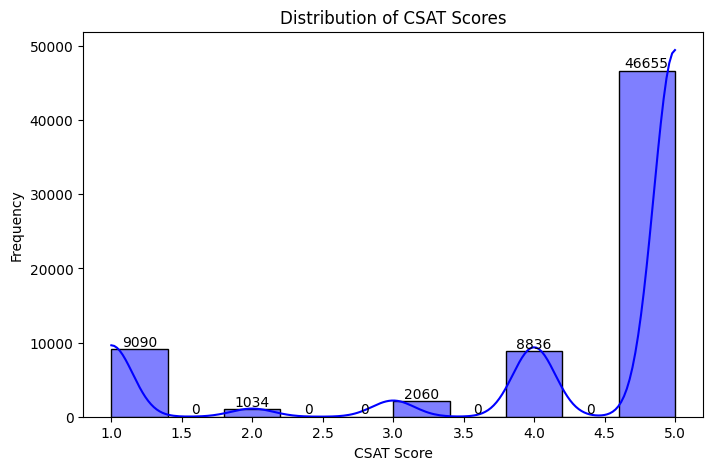

In [22]:
# Create the histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['CSAT Score'], kde=True, bins=10, color='blue')

# Add values above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')
plt.show()

2. How does CSAT Score vary across different customer service channels?

Analyzing service channels can identify high and low-performing ones.

C:\Users\Ishwar\AppData\Local\Temp\ipykernel_26132\2142604786.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='channel_name', y='CSAT Score', palette='viridis')


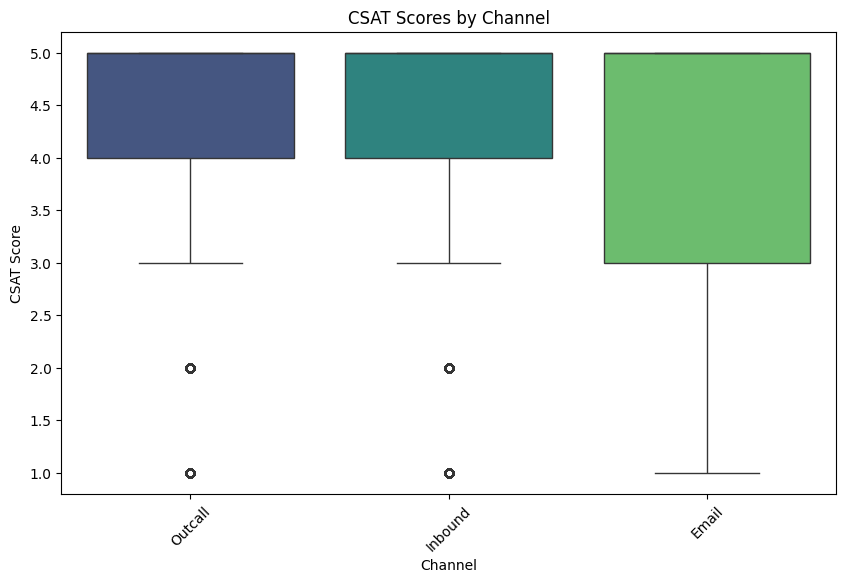

In [23]:
# visualization code 

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='channel_name', y='CSAT Score', palette='viridis')
plt.title('CSAT Scores by Channel')
plt.xticks(rotation=45)
plt.xlabel('Channel')
plt.ylabel('CSAT Score')
plt.show()

3. What are the top interaction categories for low CSAT scores?

Identifying categories frequently associated with low scores helps target improvements.



In [24]:
low_csat = df[df['CSAT Score'] <= 2]  # Assuming scores 1-2 are low
category_counts = low_csat['category'].value_counts().head(10)
category_counts

category
Returns              4362
Order Related        3400
Refund Related        585
Product Queries       454
Cancellation          424
Feedback              309
Shopzilla Related     291
Payments related      202
Offers & Cashback      55
Others                 24
Name: count, dtype: int64

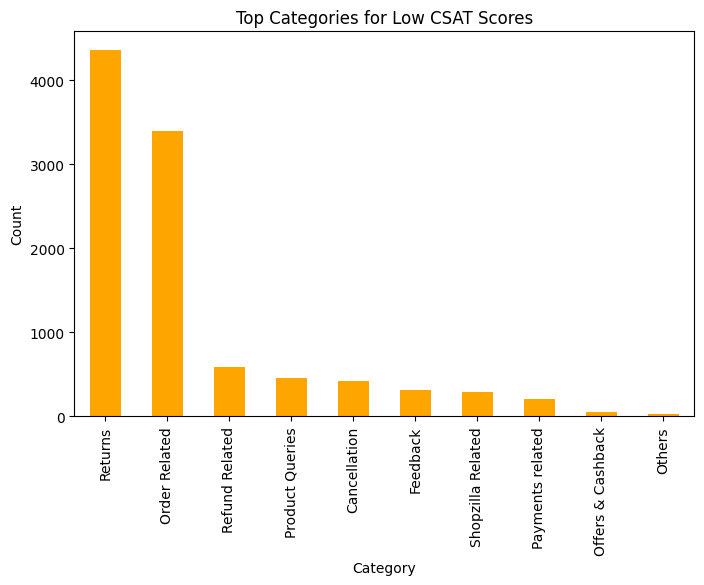

In [25]:
# visualization code 

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='orange')
plt.title('Top Categories for Low CSAT Scores')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

4. What are the top 5 channels with the highest average CSAT scores?

This will help identify which customer service channels are excelling in customer satisfaction.



In [26]:
# Calculate average CSAT score by channel_name
channel_csat_avg = df.groupby('channel_name')['CSAT Score'].mean().reset_index()

# Sort and pick top channels 
top_channels = channel_csat_avg.sort_values(by='CSAT Score', ascending=False)
top_channels

,channel_name,CSAT Score
2,Outcall,4.260682
1,Inbound,4.233473
0,Email,3.901192


C:\Users\Ishwar\AppData\Local\Temp\ipykernel_26132\1406231331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_channels, x='CSAT Score', y='channel_name', palette='viridis')


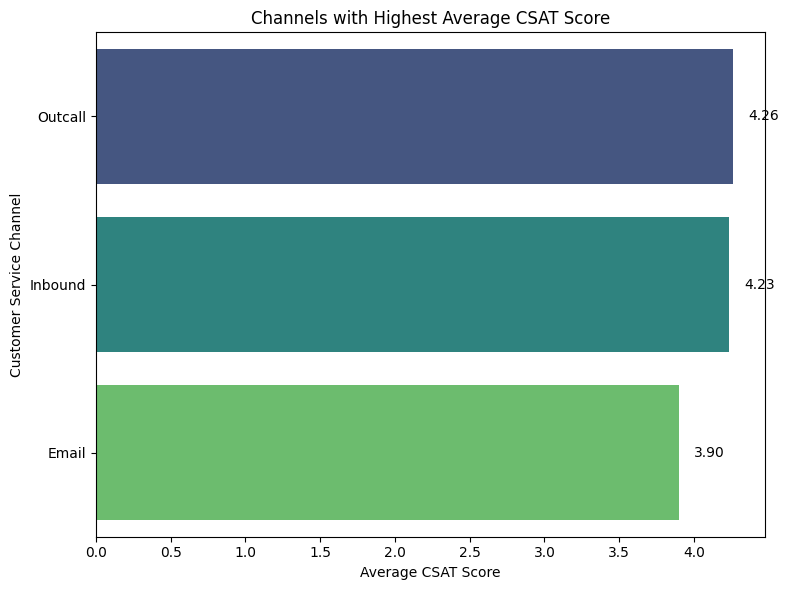

In [27]:

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=top_channels, x='CSAT Score', y='channel_name', palette='viridis')

# Add bar values
for index, value in enumerate(top_channels['CSAT Score']):
    plt.text(value + 0.1, index, f'{value:.2f}', va='center')

plt.title('Channels with Highest Average CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Customer Service Channel')
plt.tight_layout()
plt.show()

5. What is the trend of CSAT scores over time?

Checking for trends in satisfaction scores over days or weeks.

In [28]:
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'])
csat_trend = df.groupby('Survey_response_Date')['CSAT Score'].mean()
csat_trend

Survey_response_Date
2023-08-01    4.188256
2023-08-02    4.186695
2023-08-03    3.719880
2023-08-04    3.723735
2023-08-05    4.243713
2023-08-06    4.242972
2023-08-07    4.198739
2023-08-08    4.172333
2023-08-09    4.172512
2023-08-10    4.224824
2023-08-11    4.238131
2023-08-12    3.967251
2023-08-13    3.880157
2023-08-14    3.921799
2023-08-15    3.959108
2023-08-16    3.821485
2023-08-17    4.186658
2023-08-18    4.207678
2023-08-19    4.209936
2023-08-20    4.241753
2023-08-21    4.245020
2023-08-22    4.246589
2023-08-23    4.286685
2023-08-24    4.323093
2023-08-25    4.263137
2023-08-26    4.305017
2023-08-27    4.036545
2023-08-28    4.333530
2023-08-29    4.361041
2023-08-30    4.319188
2023-08-31    4.293847
Name: CSAT Score, dtype: float64

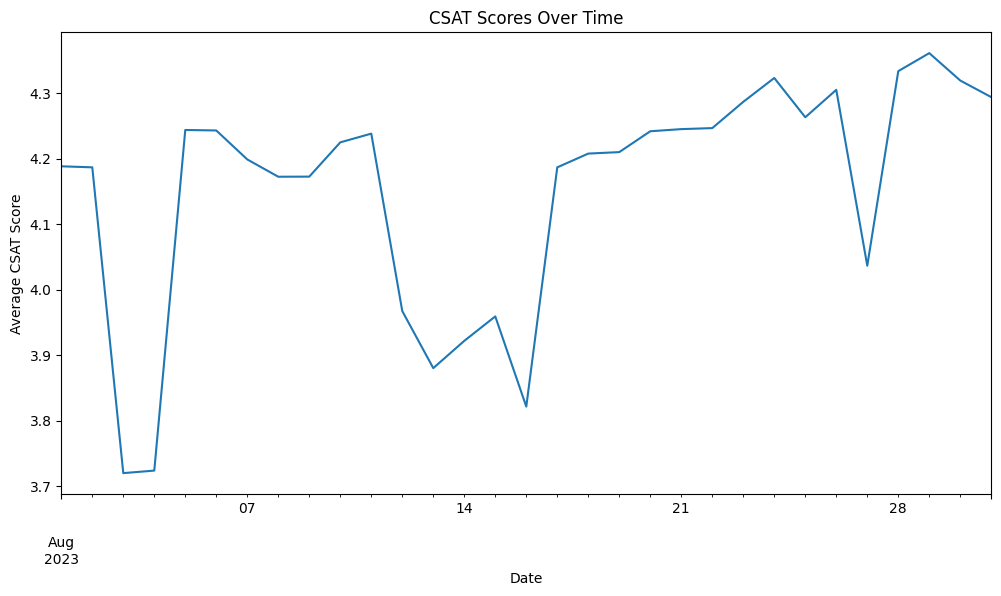

In [29]:
# visualization code

plt.figure(figsize=(12, 6))
csat_trend.plot()
plt.title('CSAT Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average CSAT Score')
plt.show()

6. Which managers and supervisors are associated with the highest average CSAT scores?

In [30]:
# Group by manager and supervisor to calculate average CSAT score
manager_supervisor_csat = (
    df.groupby(['Manager', 'Supervisor'])['CSAT Score']
    .mean()
    .reset_index()
    .sort_values(by='CSAT Score', ascending=False)
).reset_index(drop= True)

# Display top 10 results
print(manager_supervisor_csat.head(10)) 

      Manager        Supervisor  CSAT Score
0  Emily Chen      Zoe Yamamoto    4.549333
1  John Smith      Nathan Patel    4.547731
2  Olivia Tan       Mason Gupta    4.489510
3  Emily Chen      Nathan Patel    4.470460
4  Emily Chen  Elijah Yamaguchi    4.468121
5  John Smith  Elijah Yamaguchi    4.457561
6  John Smith     Olivia Suzuki    4.446058
7  John Smith      Brayden Wong    4.440851
8  Emily Chen       Olivia Wang    4.432668
9  Emily Chen     Landon Tanaka    4.430864


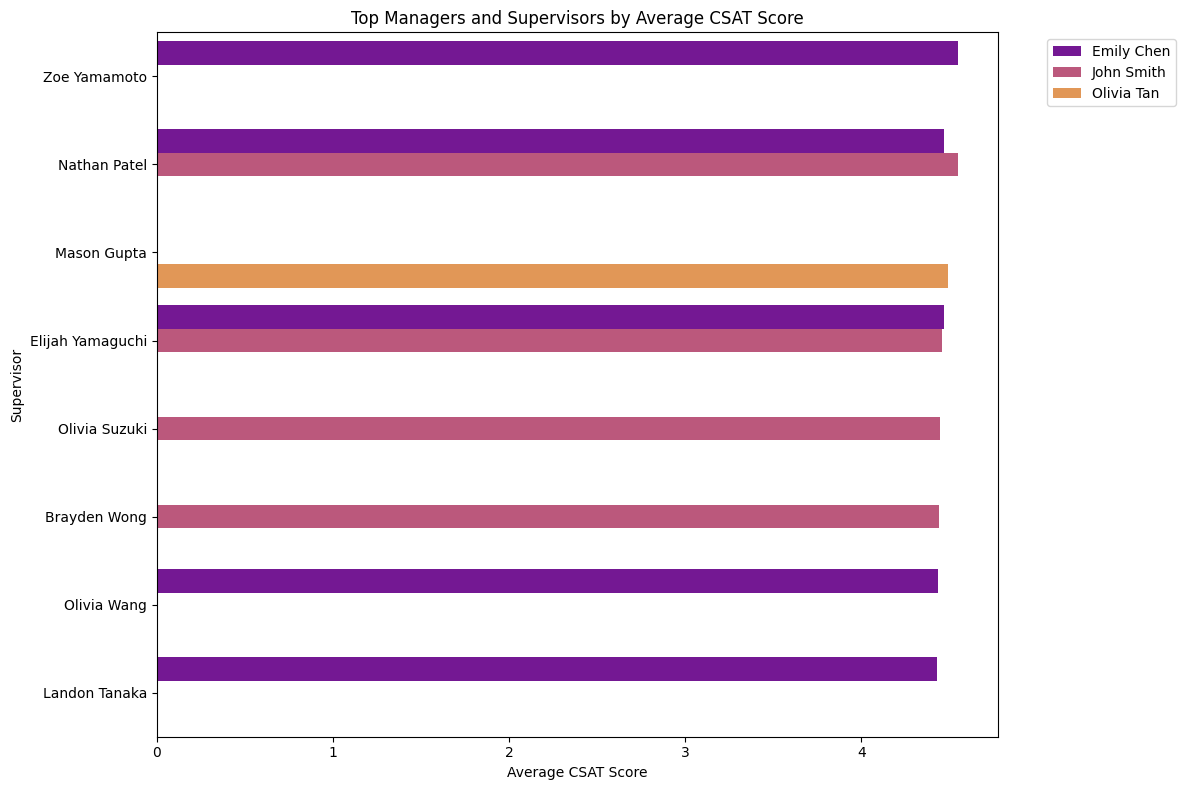

In [31]:

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=manager_supervisor_csat.head(10), x='CSAT Score', y='Supervisor', hue='Manager', palette='plasma')
plt.title('Top Managers and Supervisors by Average CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Supervisor')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

7. What is the relationship between the agent's shift (Agent Shift) and the average CSAT score?

This will help determine if shifts influence customer satisfaction.

In [32]:
# Calculate average CSAT score for each shift
shift_csat_avg = df.groupby('Agent Shift')['CSAT Score'].mean().reset_index()

# Sort for better visualization
shift_csat_avg = shift_csat_avg.sort_values(by='CSAT Score', ascending=False).reset_index(drop=True)
shift_csat_avg

,Agent Shift,CSAT Score
0,Split,4.397441
1,Afternoon,4.277997
2,Night,4.267980
3,Evening,4.261733
4,Morning,4.173269


C:\Users\Ishwar\AppData\Local\Temp\ipykernel_26132\293230286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Agent Shift', y='CSAT Score', data=shift_csat_avg, palette='viridis')


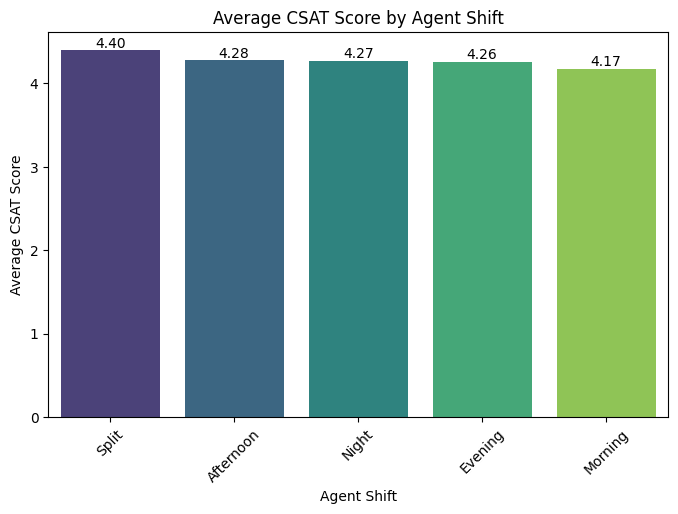

In [33]:

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Agent Shift', y='CSAT Score', data=shift_csat_avg, palette='viridis')

# Add values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title('Average CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)
plt.show()

8. Does the interaction category (Category) significantly affect the average CSAT score?

Analyzing this will help identify which categories of interaction are associated with higher or lower satisfaction.

In [34]:
# Calculate average CSAT score for each interaction category
category_csat_avg = df.groupby('category')['CSAT Score'].mean().reset_index()

# Sort for better visualization
category_csat_avg = category_csat_avg.sort_values(by='CSAT Score', ascending=False).reset_index(drop= True)
category_csat_avg

,category,CSAT Score
0,Payments related,4.374509
1,App/website,4.357143
2,Returns,4.327034
3,Shopzilla Related,4.277671
4,Refund Related,4.191870
5,Offers & Cashback,4.175141
6,Feedback,4.162177
7,Onboarding related,4.132075
8,Order Related,4.086022
9,Product Queries,4.078788


C:\Users\Ishwar\AppData\Local\Temp\ipykernel_26132\1841046070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='CSAT Score', y='category', data=category_csat_avg, palette='mako', orient='h')


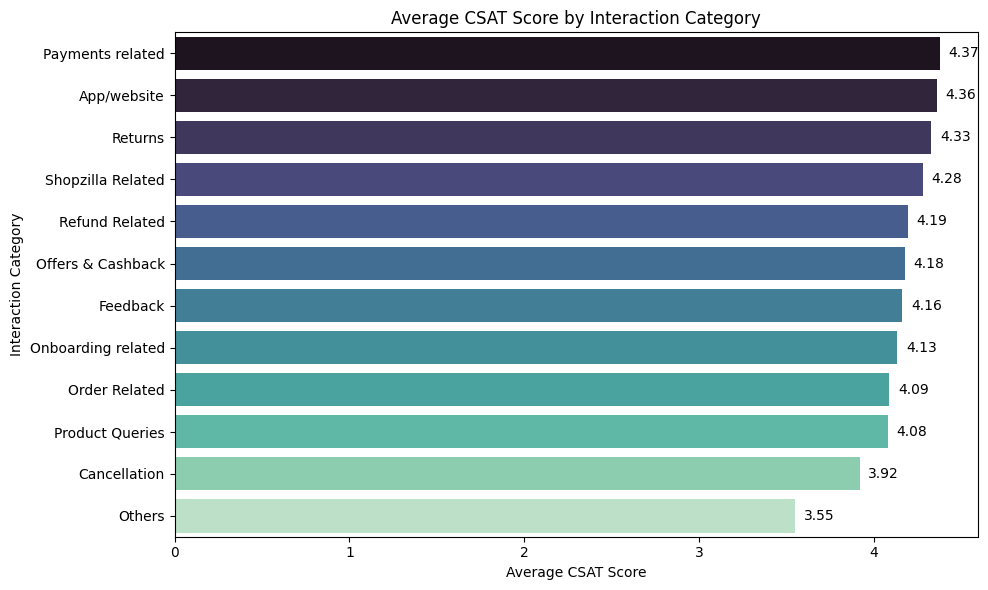

In [35]:

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CSAT Score', y='category', data=category_csat_avg, palette='mako', orient='h')

# Add values next to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Add titles and labels
plt.title('Average CSAT Score by Interaction Category')
plt.xlabel('Average CSAT Score')
plt.ylabel('Interaction Category')
plt.tight_layout()
plt.show()

9. How does the tenure bucket of agents affect CSAT scores?

In [36]:
# Calculate average CSAT score by tenure bucket
tenure_csat_avg = df.groupby('Tenure Bucket')['CSAT Score'].mean().reset_index()

# Sort the data
tenure_csat_avg = tenure_csat_avg.sort_values(by='CSAT Score', ascending=False).reset_index(drop= True)
tenure_csat_avg

,Tenure Bucket,CSAT Score
0,61-90,4.322781
1,31-60,4.283867
2,>90,4.246053
3,0-30,4.236222
4,On Job Training,4.147996


C:\Users\Ishwar\AppData\Local\Temp\ipykernel_26132\3188548849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tenure_csat_avg, x='CSAT Score', y='Tenure Bucket', palette='Spectral')


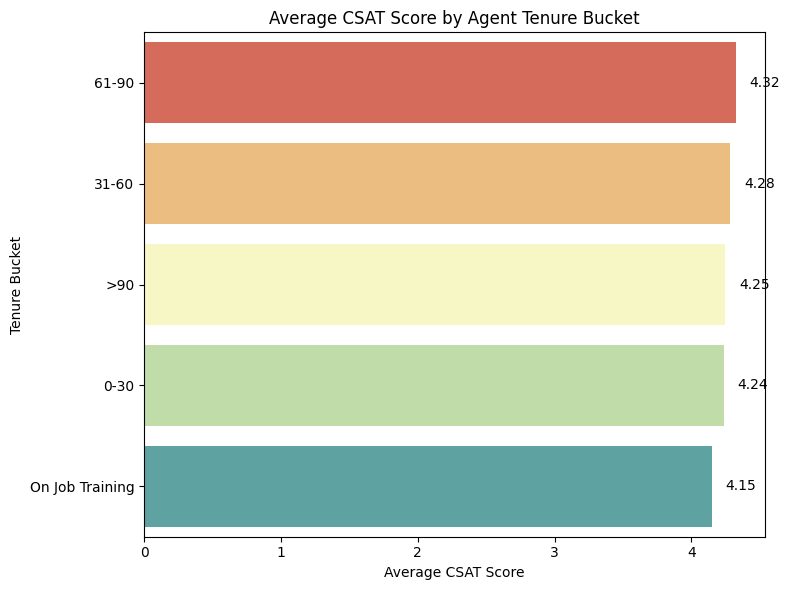

In [37]:

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=tenure_csat_avg, x='CSAT Score', y='Tenure Bucket', palette='Spectral')

# Add bar values
for index, value in enumerate(tenure_csat_avg['CSAT Score']):
    plt.text(value + 0.1, index, f'{value:.2f}', va='center')

plt.title('Average CSAT Score by Agent Tenure Bucket')
plt.xlabel('Average CSAT Score')
plt.ylabel('Tenure Bucket')
plt.tight_layout()
plt.show()

10. What is the distribution of CSAT scores across agent shifts?

In [38]:
# Count CSAT scores per agent shift
shift_csat_distribution = df.groupby('Agent Shift')['CSAT Score'].value_counts().unstack().fillna(0)
shift_csat_distribution

CSAT Score,1,2,3,4,5
Agent Shift,,,,,
Afternoon,559,85,114,582,3232
Evening,3340,383,787,3470,18505
Morning,4796,513,1047,4356,22156
Night,130,20,33,97,735
Split,265,33,79,331,2027


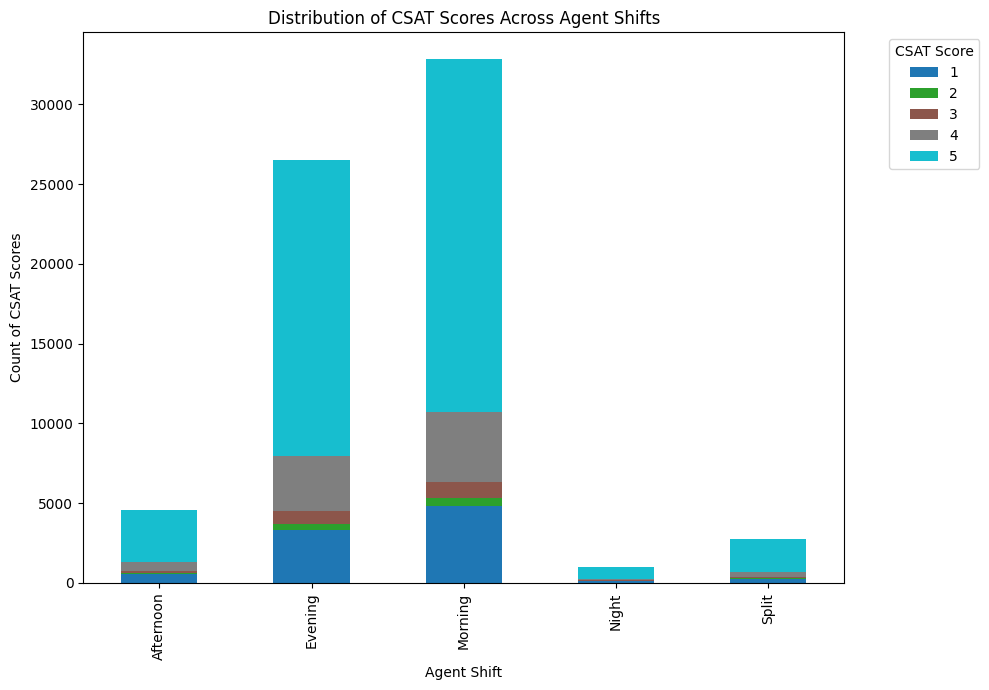

In [39]:

# Plot a stacked bar chart
shift_csat_distribution.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab10')

plt.title('Distribution of CSAT Scores Across Agent Shifts')
plt.xlabel('Agent Shift')
plt.ylabel('Count of CSAT Scores')
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Data Transformation

* Handling Categorical Variables

Categorical columns like channel_name, category, Sub-category, etc., need encoding for neural network inputs. Use one-hot encoding to transform these variables.

In [40]:
# One-hot encoding for categorical variables

categorical_columns = ['channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [41]:
df_encoded.head()

,Unique id,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,CSAT Score,channel_name_Inbound,channel_name_Outcall,category_Cancellation,...,Manager_Olivia Tan,Manager_William Kim,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,No Remarks,c27c9bb4-fa36-4140-9f1f-21009254ffdb,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,5,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,No Remarks,d406b0c7-ce17-4654-b9de-f08d421254bd,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,5,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,200814dd-27c7-4149-ba2b-bd3af3092880,No Remarks,c273368d-b961-44cb-beaf-62d6fd6c00d5,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,5,True,False,False,...,False,True,False,False,False,True,True,False,False,False
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,No Remarks,5aed0059-55a4-4ec6-bb54-97942092020a,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,5,True,False,False,...,False,False,False,False,True,False,True,False,False,False
4,ba903143-1e54-406c-b969-46c52f92e5df,No Remarks,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,5,True,False,True,...,False,False,False,False,False,False,False,True,False,False


* Normalizing the CSAT Score

Normalization scales numeric columns (like CSAT Score) between 0 and 1 to ensure uniformity across model inputs.

In [42]:
# Initialize scaler
scaler = MinMaxScaler()

# Normalize CSAT Score
df_encoded['CSAT Score'] = scaler.fit_transform(df_encoded[['CSAT Score']])


* Converting DateTime Columns

Transform datetime columns (Issue_reported at, issue_responded, Survey_response_Date) into numeric features like hour, day, etc.

In [43]:
# Extract datetime features
for col in ['Issue_reported at', 'issue_responded', 'Survey_response_Date']:
    df_encoded[f'{col}_hour'] = pd.to_datetime(df[col]).dt.hour
    df_encoded[f'{col}_day'] = pd.to_datetime(df[col]).dt.day
    df_encoded[f'{col}_month'] = pd.to_datetime(df[col]).dt.month

# Drop original datetime columns
df_encoded.drop(['Issue_reported at', 'issue_responded', 'Survey_response_Date'], axis=1, inplace=True)


### Splitting Data

Split the dataset into training and testing sets for model training.

In [44]:
df_encoded.drop(columns=['Unique id', 'Order_id', 'Customer Remarks'], axis= 1, inplace= True)

In [45]:
df_encoded.head()

,CSAT Score,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,category_Others,category_Payments related,...,Agent Shift_Split,Issue_reported at_hour,Issue_reported at_day,Issue_reported at_month,issue_responded_hour,issue_responded_day,issue_responded_month,Survey_response_Date_hour,Survey_response_Date_day,Survey_response_Date_month
0,1.0,False,True,False,False,False,False,False,False,False,...,False,11,1,8,11,1,8,0,1,8
1,1.0,False,True,False,False,False,False,False,False,False,...,False,12,1,8,12,1,8,0,1,8
2,1.0,True,False,False,False,False,False,True,False,False,...,False,20,1,8,20,1,8,0,1,8
3,1.0,True,False,False,False,False,False,False,False,False,...,False,20,1,8,21,1,8,0,1,8
4,1.0,True,False,True,False,False,False,False,False,False,...,False,10,1,8,10,1,8,0,1,8


In [46]:
# Define features (X) and target (y)
X = df_encoded.drop(['CSAT Score'], axis=1)
y = df_encoded['CSAT Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
print(X_train.dtypes)
print(X_test.dtypes)

channel_name_Inbound           bool
channel_name_Outcall           bool
category_Cancellation          bool
category_Feedback              bool
category_Offers & Cashback     bool
                              ...  
issue_responded_day           int32
issue_responded_month         int32
Survey_response_Date_hour     int32
Survey_response_Date_day      int32
Survey_response_Date_month    int32
Length: 1500, dtype: object
channel_name_Inbound           bool
channel_name_Outcall           bool
category_Cancellation          bool
category_Feedback              bool
category_Offers & Cashback     bool
                              ...  
issue_responded_day           int32
issue_responded_month         int32
Survey_response_Date_hour     int32
Survey_response_Date_day      int32
Survey_response_Date_month    int32
Length: 1500, dtype: object


In [48]:
# converting boolean data type to innteger
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [49]:
# Ensure target values are within expected range before scaling:
# This assumes original CSAT scores were in range [1, 5]
# If not, adjust the range accordingly
original_y_train = scaler.inverse_transform(y_train.values.reshape(-1, 1)).astype(int).ravel()
assert set(original_y_train).issubset(set([1, 2, 3, 4, 5]))

# Convert target to one-hot encoded format
y_train_cat = to_categorical(original_y_train - 1)  # Classes 0-4 for one-hot encoding
y_test_cat = to_categorical(scaler.inverse_transform(y_test.values.reshape(-1, 1)).astype(int).ravel() - 1)


In [50]:
# Define ANN model architecture

model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),       # Dropout layer with 30% rate 
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

c:\Users\Ishwar\custom_support\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6764 - loss: 1.0474 - val_accuracy: 0.6890 - val_loss: 0.9692
Epoch 2/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6869 - loss: 0.9678 - val_accuracy: 0.6890 - val_loss: 0.9525
Epoch 3/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6900 - loss: 0.9504 - val_accuracy: 0.6890 - val_loss: 0.9444
Epoch 4/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6889 - loss: 0.9437 - val_accuracy: 0.6890 - val_loss: 0.9396
Epoch 5/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6857 - loss: 0.9470 - val_accuracy: 0.6891 - val_loss: 0.9369
Epoch 6/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6900 - loss: 0.9354 - val_accuracy: 0.6892 - val_loss: 0.9345
Epoch 7/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6876 - loss: 0.9349 - val_accuracy: 0.6900 - val_loss: 0.9370
Epoch 8/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6895 - loss: 0.9265 - 

### Key Observations

* Training Accuracy:

Your model achieves ~70% accuracy on the training data.
This suggests that the model has learned patterns from the training dataset to a reasonable extent.

* Validation Accuracy:

The validation accuracy is ~69%, which is lower than the training accuracy.
This could indicate some level of overfitting, where the model performs well on training data but struggles to generalize to unseen data.

* Loss Values:

The training loss is 0.89, while the validation loss is higher at 0.96.
A significant gap between training and validation loss further supports the possibility of overfitting.

* Test Accuracy:

The test accuracy is ~69.29%, consistent with the validation accuracy. This indicates that your model's generalization performance is being correctly captured during training.

In [51]:
# Consider additional preprocessing techniques
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Feature scaling with StandardScaler (might work better than MinMaxScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection to reduce noise
selector = SelectKBest(f_classif, k=50)  # Select top 50 features
X_selected = selector.fit_transform(X_scaled, y)

c:\Users\Ishwar\custom_support\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [1496 1497 1499] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Ishwar\custom_support\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# Learning rate reduction
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=5, 
    min_lr=0.00001
)

# Improved model training
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,  # Use validation split instead of separate test set
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6991 - loss: 0.8787 - val_accuracy: 0.6960 - val_loss: 0.8743 - learning_rate: 0.0010
Epoch 2/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7047 - loss: 0.8651 - val_accuracy: 0.6948 - val_loss: 0.8833 - learning_rate: 0.0010
Epoch 3/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7007 - loss: 0.8731 - val_accuracy: 0.6994 - val_loss: 0.8725 - learning_rate: 0.0010
Epoch 4/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7045 - loss: 0.8650 - val_accuracy: 0.6971 - val_loss: 0.8713 - learning_rate: 0.0010
Epoch 5/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6997 - loss: 0.8692 - val_accuracy: 0.6962 - val_loss: 0.8764 - learning_rate: 0.0010
Epoch 6/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6989 - loss: 0.8704 - val_accuracy: 0.6975 - val_loss: 0.8845 - learning_rate: 0.0010
Epoch 7/100
677/677 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7005 - loss: 0.

### Observations 

* Implemented EarlyStopping to halt training when validation loss stops improving for 10 consecutive epochs, helps in preventing unnecessary overfitting.

* Added ReduceLROnPlateau to dynamically adjust the learning rate when validation loss plateaus.

* The small gap between training (70.53%) and validation accuracy (69.93%) suggests the model generalizes well and isn't overfitting.

* Neural networks require substantial data to generalize well, and the current dataset size may be a limiting factor.

* To address this, techniques such as data augmentation, synthetic data generation, or transfer learning from pre-trained models could be explored.

### Save model and scaler file

In [53]:
# Save the model - make sure this runs successfully
model.save("csat_model.keras")

# Save the scaler - make sure this runs successfully
import joblib
joblib.dump(scaler, "scaler.pkl")

# Print the current working directory to verify where files are being saved
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\Ishwar\custom_support\notebook


In [54]:
# Check if files exist
import os

model_path = "csat_model.keras"
scaler_path = "scaler.pkl"

print(f"Model file exists: {os.path.exists(model_path)}")
print(f"Scaler file exists: {os.path.exists(scaler_path)}")

Model file exists: True
Scaler file exists: True
